In [110]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [111]:
#Reading the Data file
liver_ds = pd.read_csv('indian_liver_patient.csv')

In [112]:
#Getting the shape of the Dataset
liver_ds.shape

(583, 11)

In [113]:
#Displaying the Columns in the Dataset.
liver_ds.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [114]:
#Getting information on Each Column
liver_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [115]:
#Getting all the stats for individual columns
liver_ds.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [116]:
#Finding out the Null values in the Column
liver_ds.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [117]:
#Getting the Null values from the Albumin_and_Globulin_Ratio Column
liver_ds[liver_ds["Albumin_and_Globulin_Ratio"].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [119]:
# filling with Mean
liver_ds.Albumin_and_Globulin_Ratio.fillna(liver_ds['Albumin_and_Globulin_Ratio'].mean(), inplace=True)

In [120]:
#Cross-checking whether the Null values are filled or not
liver_ds[liver_ds["Albumin_and_Globulin_Ratio"].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [121]:
#Renaming the Dependent column name and replacing value "2" with value "0"
liver_ds.rename(columns = {'Dataset':'Outcome'}, inplace = True)
liver_ds['Outcome'].replace(to_replace=2, value=0, inplace=True)

In [122]:
#Cross checking the Outcome column values
liver_ds.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [45]:
#Grouping Outcome values 
liver_ds.groupby('Outcome').size()

Outcome
0    167
1    416
dtype: int64

Number of patients that are male  441
Number of patients that are female  142
Percent of patients that have liver disease:  71.35506003430532
Percent of male patients that have liver disease:  73.46938775510205
Percent of female patients that have liver disease:  64.7887323943662


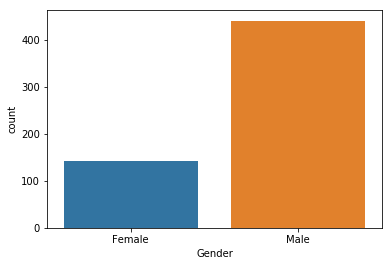

In [125]:
#ANSWER FOR QUESTION 1 AND 2 in the Document.

sns.countplot(data=liver_ds, x = 'Gender', label='Count')

M,F =liver_ds['Gender'].value_counts()

print("Number of patients that are male " ,M)
print("Number of patients that are female " ,F)

malesWithLiverDisease = liver_ds[(liver_ds['Gender'] == 'Male') & (liver_ds['Outcome'] == 1)]['Age'].count()
femalesWithLiverDisease = liver_ds[(liver_ds['Gender'] == 'Female') & (liver_ds['Outcome'] == 1)]['Age'].count()
patientsWithLiverDisease = liver_ds[liver_ds['Outcome'] == 1]['Age'].count()
totalPatients = liver_ds['Age'].count()
print('Percent of patients that have liver disease: ',patientsWithLiverDisease /totalPatients * 100)
print('Percent of male patients that have liver disease: ',malesWithLiverDisease /M * 100)
print('Percent of female patients that have liver disease: ',femalesWithLiverDisease /F * 100)



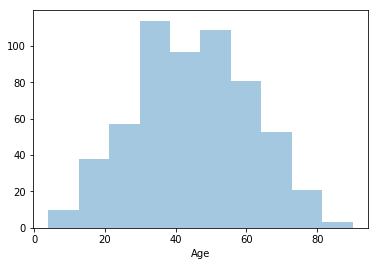

In [89]:
# Showing different age groups in dataset
sns.distplot(liver_ds['Age'],bins=10,kde=False)

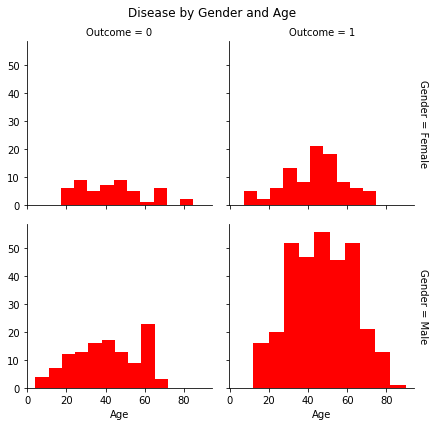

In [56]:
#Answer to Question 3
#Will Gender and Age effect the Outcome?

g = sns.FacetGrid(liver_ds, col="Outcome", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

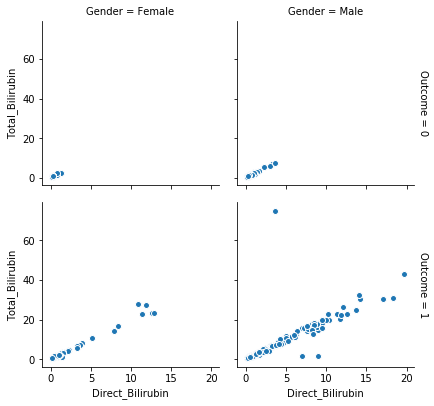

In [61]:
#Answer to Question 4
# direct Relationship Total_Bilirubin and Direct_Bilirubin

g = sns.FacetGrid(liver_ds, col="Gender", row="Outcome", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

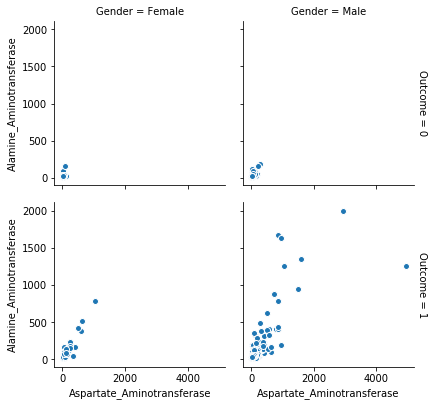

In [63]:
#Answer to Question 5
#linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. 

g = sns.FacetGrid(liver_ds, col="Gender", row="Outcome", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

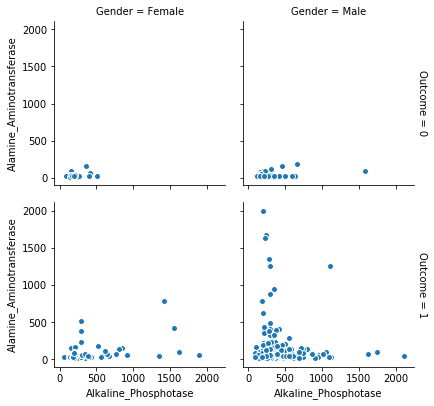

In [65]:

#No linear correlation between Alkaline_Phosphotase and Alamine_Aminotransferase

g = sns.FacetGrid(liver_ds, col="Gender", row="Outcome", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

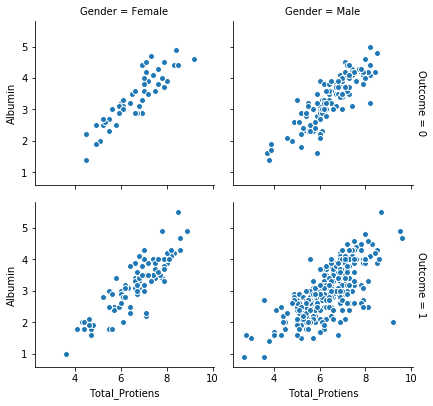

In [69]:
#linear relationship between Total_Protiens and Albumin and the gender.

g = sns.FacetGrid(liver_ds, col="Gender", row="Outcome", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

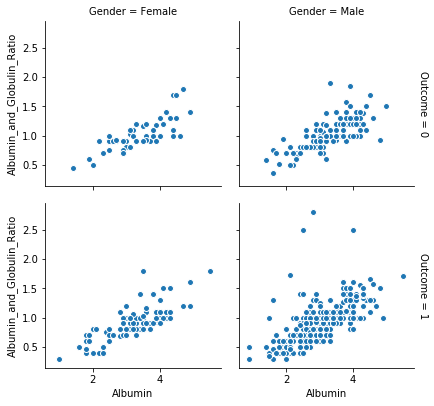

In [71]:
#linear relationship between Albumin_and_Globulin_Ratio and Albumin
g = sns.FacetGrid(liver_ds, col="Gender", row="Outcome", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

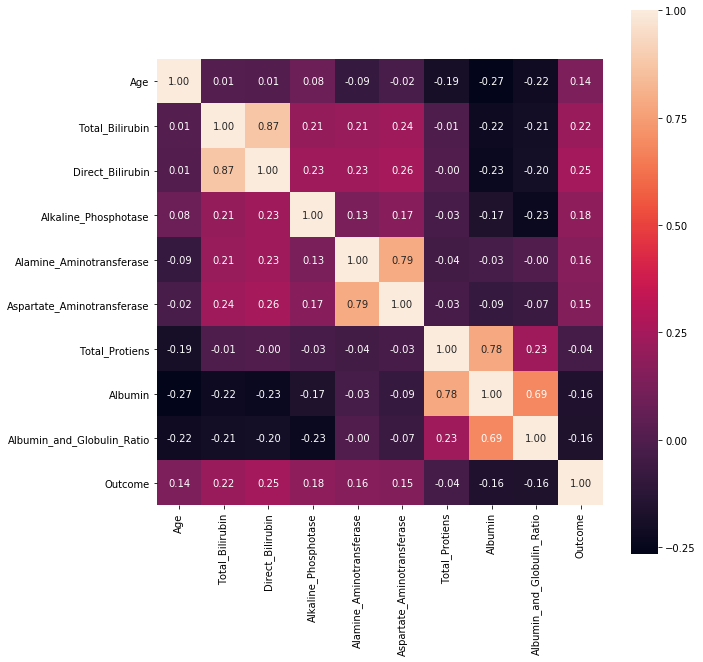

In [74]:

# calculate correlation coefficients for all dataset
correlations = liver_ds.corr()

# and visualize
plt.figure(figsize=(10, 10))
g = sns.heatmap(correlations, cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10})

# based on correlation, you can exclude some highly correlated features